# Event Detection: Action Potentials

### Set up the environment

In [63]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
np.set_printoptions(precision=3)
sys.path.insert(0, '../src/')

Import the pyabf module (and pyabf.events)

In [26]:
import pyabf
import pyabf.events # THIS IS NEW!
abf=pyabf.ABF("../data/17o05028_ic_steps.abf")

Let's start out by simply displaying all the sweeps:

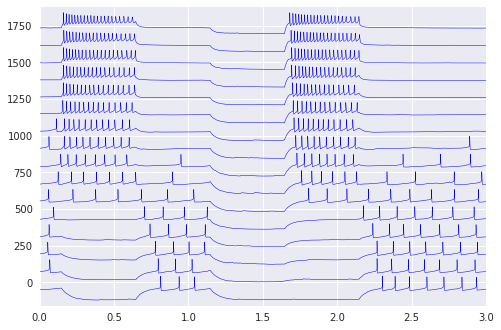

In [27]:
for sweep in abf.sweepList:
    abf.setSweep(sweep)
    offset=120*sweep
    plt.plot(abf.dataX,abf.dataY+offset,color='b',linewidth=.5)
plt.margins(0,.02)

This demonstrates how to identify the location of all events meeting a _derivative threshold detection_ method:

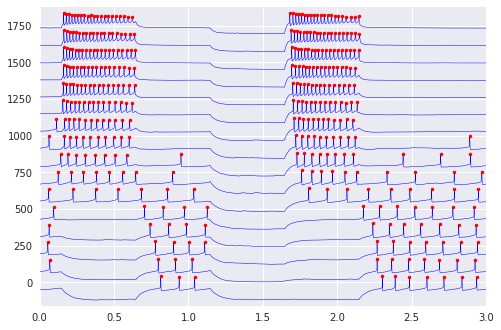

In [44]:
for sweep in abf.sweepList:
    abf.setSweep(sweep)
    offset=120*sweep
    plt.plot(abf.dataX,abf.dataY+offset,color='b',linewidth=.5)
    eventTimes=pyabf.events.detectDeriv(abf,threshold=4,mustRevertMS=5,alignToRawPeak=True)
    for timePoint in eventTimes:
        plt.plot(timePoint,abf.dataY[int(timePoint*abf.pointsPerSec)]+offset,'r.')
plt.margins(0,.02)

Let's confine our area of interest to an epoch:

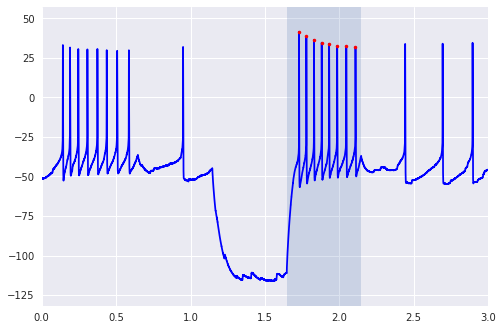

In [51]:
mark1,mark2=abf.epochStartSec[4],abf.epochStartSec[5] # epoch B
abf.plotSweeps(7)
plt.axvspan(mark1,mark2,alpha=.2);
eventTimes=pyabf.events.detectDeriv(abf,t1=mark1,t2=mark2,threshold=4,mustRevertMS=5,alignToRawPeak=True)
for timePoint in eventTimes:
    plt.plot(timePoint,abf.dataY[int(timePoint*abf.pointsPerSec)],'r.')

In [71]:
mark1,mark2=abf.epochStartSec[4],abf.epochStartSec[5] # epoch B
freqs=[]
currents=[]
for sweep in abf.sweepList:
    abf.setSweep(sweep)
    eventTimes=pyabf.events.detectDeriv(abf,t1=mark1,t2=mark2,threshold=4,mustRevertMS=5)
    currents.append(abf.dataC[int(mark1*abf.pointsPerSec)+1])
    freqs.append(len(eventTimes)/(mark2-mark1))
    print("sweep %d: %d pA yielded %.02f Hz APs"%(sweep,currents[-1],freqs[-1]))

sweep 0: -50 pA yielded 0.00 Hz APs
sweep 1: -40 pA yielded 0.00 Hz APs
sweep 2: -30 pA yielded 0.00 Hz APs
sweep 3: -20 pA yielded 0.00 Hz APs
sweep 4: -10 pA yielded 0.00 Hz APs
sweep 5: 0 pA yielded 6.00 Hz APs
sweep 6: 10 pA yielded 12.00 Hz APs
sweep 7: 20 pA yielded 16.00 Hz APs
sweep 8: 30 pA yielded 20.00 Hz APs
sweep 9: 40 pA yielded 24.00 Hz APs
sweep 10: 50 pA yielded 28.00 Hz APs
sweep 11: 60 pA yielded 30.00 Hz APs
sweep 12: 70 pA yielded 34.00 Hz APs
sweep 13: 80 pA yielded 38.00 Hz APs
sweep 14: 90 pA yielded 38.00 Hz APs
sweep 15: 100 pA yielded 42.00 Hz APs


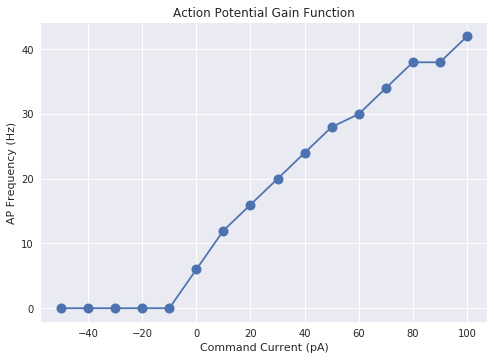

In [73]:
plt.plot(currents,freqs,'.-',ms=20)
plt.title("Action Potential Gain Function")
plt.ylabel("AP Frequency (Hz)")
plt.xlabel("Command Current (pA)")

Let's display details about individual action potentials:

In [90]:
# go to a good sweep and do event detection
abf.setSweep(6)
eventTimes=pyabf.events.detectDeriv(abf,t1=mark1,t2=mark2,threshold=4,mustRevertMS=5)

# build-up a 2D array of stacked APs
padPoints=int(abf.pointsPerMS*10)
traces=np.empty((len(eventTimes),padPoints*2))
for eventNumber,eventTime in enumerate(eventTimes):
    eventI=int(eventTime*abf.pointsPerSec)
    traces[eventNumber]=abf.dataY[eventI-padPoints:eventI+padPoints]
print(traces)

[[-41.026 -41.058 -41.026 ..., -55.509 -55.476 -55.476]
 [-40.763 -40.731 -40.698 ..., -53.15  -53.15  -53.084]
 [-40.862 -40.862 -40.894 ..., -52.494 -52.494 -52.429]
 [-39.027 -38.994 -38.994 ..., -52.134 -52.134 -52.101]
 [-37.388 -37.388 -37.356 ..., -52.167 -52.167 -52.134]
 [-37.683 -37.683 -37.683 ..., -51.413 -51.38  -51.347]]


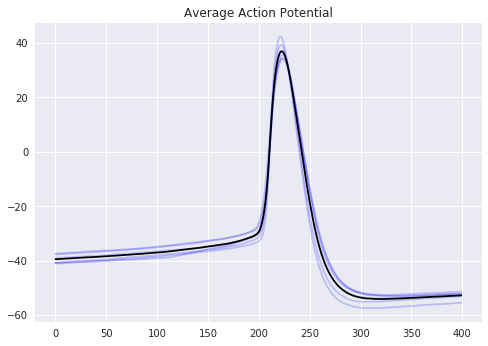

In [102]:
# plot each trace and show the average
for trace in traces:
    plt.plot(trace,color='b',alpha=.2)
plt.plot(np.average(traces,axis=0),color='k')
plt.title("Average Action Potential");

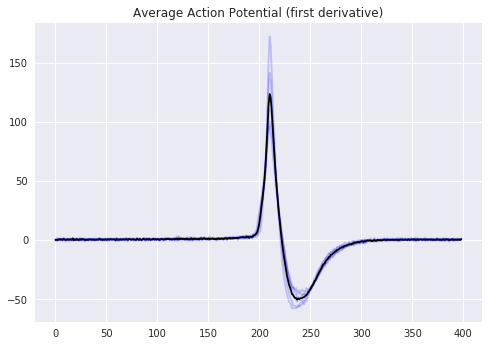

In [103]:
# Show the same graph but of the first derivative
tracesD=np.diff(traces)*abf.pointsPerMS
for traceD in tracesD:
    plt.plot(traceD,color='b',alpha=.2)
plt.plot(np.average(tracesD,axis=0),color='k')
plt.title("Average Action Potential (first derivative)");